# Explore Exercises

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import nltk
import acquire
import prepare

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
from env import user, password, host

In [4]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [5]:
url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 1) Spam Data

Load the spam data set.
Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
Is there any overlap in the bigrams for the spam data and the ham data?
Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [6]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [7]:
# combine all messages in single string by label

ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [8]:
# create each words set to series and look at frequency 
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()
all_freq

i             2350
to            2240
you           2124
a             1431
the           1322
              ... 
opponenter       1
2mro             1
occurs           1
1mcflyall        1
rs5              1
Length: 9557, dtype: int64

In [9]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


In [10]:
# sort by 'all'
word_counts.sort_values('all', ascending=False).head(20)

,ham,spam,all
i,2305,45,2350
to,1554,686,2240
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322
u,986,147,1133
and,848,122,970
is,728,158,886
in,811,73,884
me,756,30,786


Text(0.5, 1.0, 'Ham vs Spam count for the top 20 most frequent words')

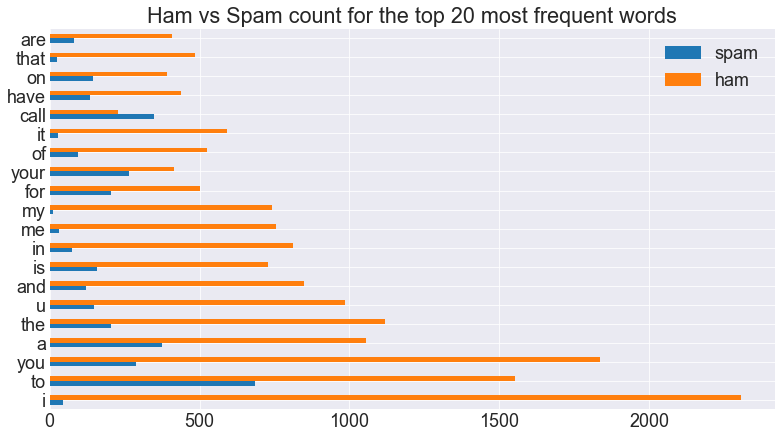

In [11]:
plt.rc('font', size=18)
word_counts.sort_values('all', ascending=False).head(20)[['spam', 'ham']].plot.barh()
plt.title('Ham vs Spam count for the top 20 most frequent words')

Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

<Figure size 1152x648 with 0 Axes>

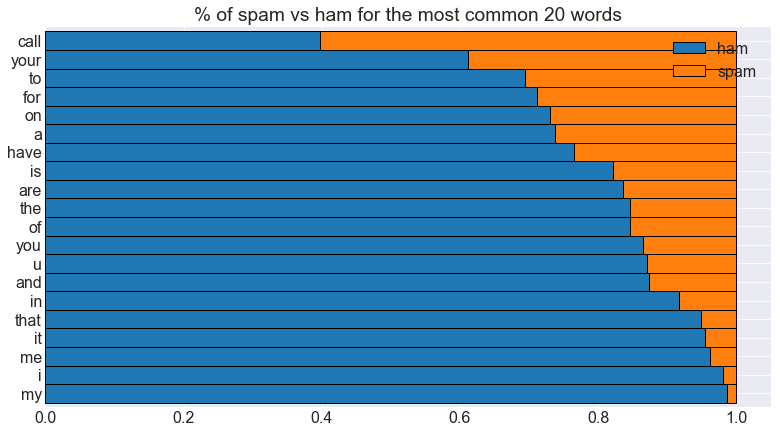

In [12]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of spam vs ham for the most common 20 words')

In [13]:
# create bi-gram

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

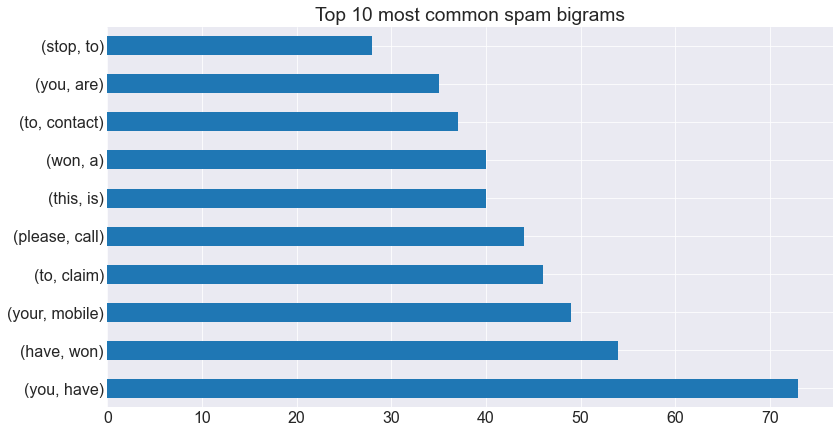

In [14]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')

Text(0.5, 1.0, 'Top 10 most common ham bigrams')

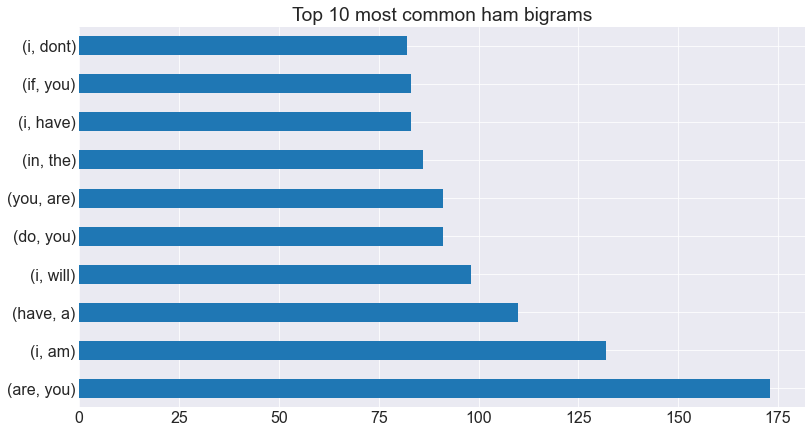

In [15]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams')

Text(0.5, 1.0, 'Top 10 most common all words bigrams')

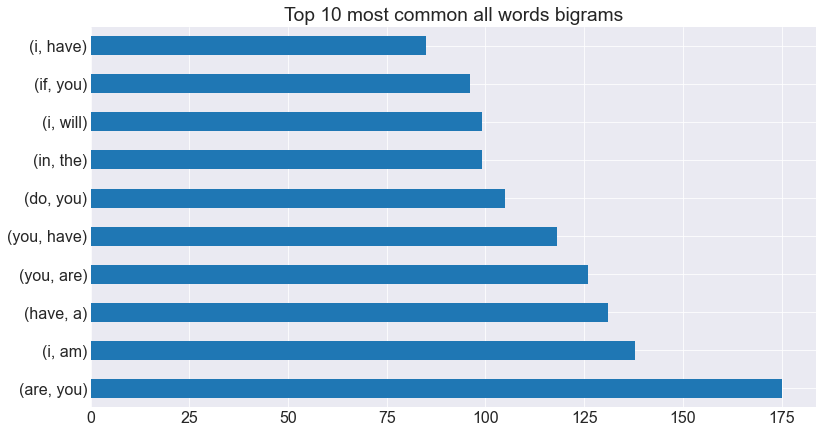

In [16]:
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common all words bigrams')

# 2) Explore the blog articles using the techniques discussed in the exploration lesson.

In [17]:
df = acquire.get_blog_articles()
df.head()

,title,published,content
0,Codeup Dallas Open House,"Nov 30, 2021",Come join us for the re-opening of our Dallas ...
1,Codeup’s Placement Team Continues Setting Records,"Nov 19, 2021",Our Placement Team is simply defined as a grou...
2,"IT Certifications 101: Why They Matter, and Wh...","Nov 18, 2021","AWS, Google, Azure, Red Hat, CompTIA…these are..."
3,A rise in cyber attacks means opportunities fo...,"Nov 17, 2021","In the last few months, the US has experienced..."
4,Use your GI Bill® benefits to Land a Job in Tech,"Nov 4, 2021","As the end of military service gets closer, ma..."


In [18]:
df_clean = prepare.prep_article_data(df, 'content', extra_words=[], exclude_words=[])
df_clean.head()

,title,published,content,clean,stemmed,lemmatized
0,Codeup Dallas Open House,"Nov 30, 2021",Come join us for the re-opening of our Dallas ...,come join us reopening dallas campus drinks sn...,come join us reopen dalla campu drink snack co...,come join u reopening dallas campus drink snac...
1,Codeup’s Placement Team Continues Setting Records,"Nov 19, 2021",Our Placement Team is simply defined as a grou...,placement team simply defined group manages re...,placement team simpli defin group manag relati...,placement team simply defined group manages re...
2,"IT Certifications 101: Why They Matter, and Wh...","Nov 18, 2021","AWS, Google, Azure, Red Hat, CompTIA…these are...",aws google azure red hat comptiathese big name...,aw googl azur red hat comptiathes big name onl...,aws google azure red hat comptiathese big name...
3,A rise in cyber attacks means opportunities fo...,"Nov 17, 2021","In the last few months, the US has experienced...",last months us experienced dozens major cybera...,last month us ha experienc dozen major cyberat...,last month u ha experienced dozen major cybera...
4,Use your GI Bill® benefits to Land a Job in Tech,"Nov 4, 2021","As the end of military service gets closer, ma...",end military service gets closer many transiti...,end militari servic get closer mani transit se...,end military service get closer many transitio...


In [19]:
all_blog_lemmatized = ' '.join(df.lemmatized)
all_blog_lemmatized

'come join u reopening dallas campus drink snack codeup curious campus look like click register free event come join u reopening dallas campus drink snack codeup curious campus look like interested web development career accelerator keen chat instructor financial aid rep open house answer question meet codeup instructor help explain whats taught class answer question understand join one upcoming cohort dec 6th dont miss opportunity learn start new year transitioning new exciting career tech answer question may codeup future take first step new career today create tomorrow placement team simply defined group manages relationship employer partner graduating student help get graduating student hired last quarter placement team helped 48 student get hired lifechanging career tech last month placement team ha already placed 40 student top tech company want send huge thank placement team employer partner done tremendous job helping codeup empower life change student exactly got hired check l

In [20]:
word_counts = pd.Series(all_blog_lemmatized.split()).value_counts()
word_counts

tech         51
codeup       42
system       41
program      40
career       40
             ..
website       1
special       1
stagnant      1
framework     1
rather        1
Length: 1402, dtype: int64

In [21]:
# plt.rc('font', size=18)
# word_counts.sort_values('all', ascending=False).head(20)[['spam', 'ham']].plot.barh()
# plt.title('Ham vs Spam count for the top 20 most frequent words')

Text(0.5, 1.0, 'Blog Word Count for the top 20 most frequent words')

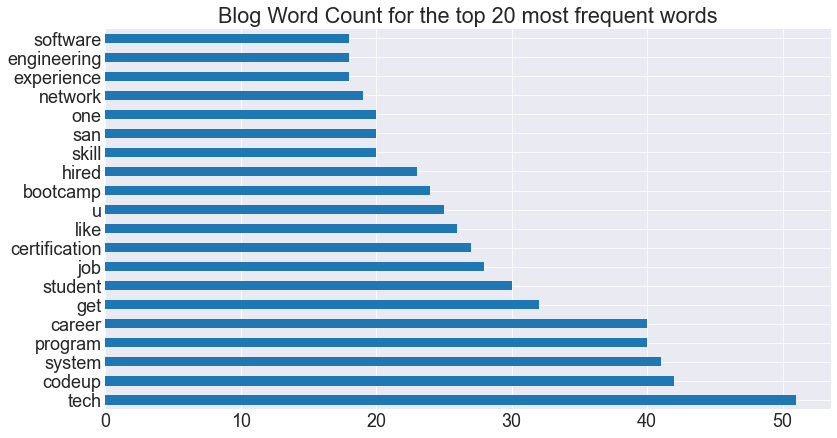

In [22]:
plt.rc('font', size=18)
word_counts.head(20).plot.barh()
plt.title('Blog Word Count for the top 20 most frequent words')

In [23]:
# plt.figure(figsize=(16, 9))
# plt.rc('font', size=16)

# (word_counts.sort_values('all', ascending=False)
#  .head(20)
#  .apply(lambda row: row/row['all'], axis = 1)
#  .drop(columns = 'all')
#  .sort_values(by = 'spam')
#  .plot.barh(stacked = True, width = 1, ec = 'k')
# )
# plt.title('% of spam vs ham for the most common 20 words')

Text(0.5, 1.0, 'Top 10 most common blog word bigrams')

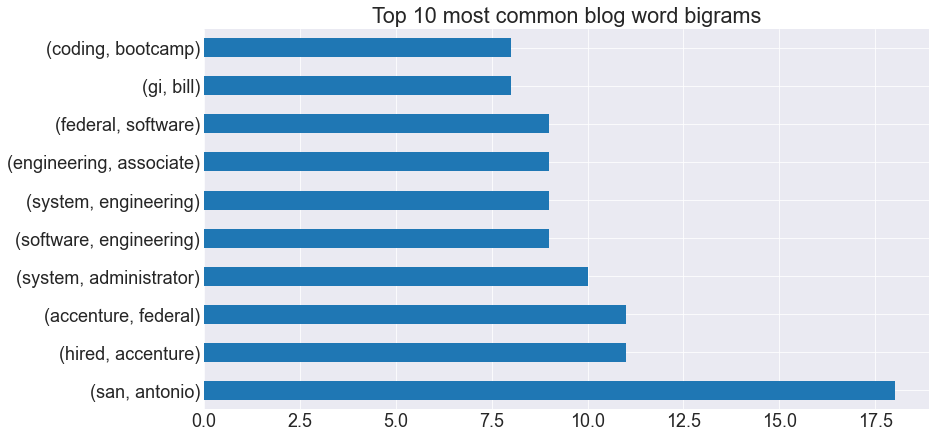

In [24]:
pd.Series(nltk.bigrams(all_blog_lemmatized.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common blog word bigrams')

# 3) Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [25]:
df = acquire.get_inshorts_articles()
df.head()

,title,author,content,date,category
0,Drop in Meta's market value more than the tota...,Arshiya Chopra,After Facebook parent Meta lost $251 billion i...,"04 Feb 2022,Friday",business
1,Meta drops below Berkshire Hathaway in market ...,Hiral Goyal,Meta Platforms is now worth about $50 billion ...,"04 Feb 2022,Friday",business
2,Facebook's user growth in India slowed due to ...,Sakshita Khosla,Facebook's user growth in India was hit due to...,"04 Feb 2022,Friday",business
3,Amazon adds $135 bn in one of the biggest 1-da...,Hiral Goyal,Amazon added more than $135 billion in market ...,"04 Feb 2022,Friday",business
4,I am sorry for nothing: BharatPe Co-founder As...,Kiran Khatri,When asked if he'd want to say something to hi...,"04 Feb 2022,Friday",business


In [26]:
df = prepare.prep_article_data(df, column='content', extra_words=['said',
                                                                                   'ha',
                                                                                   'added',
                                                                                   'wa',
                                                                                   'crore',
                                                                                   'one',
                                                                                   'two',
                                                                                   'also',
                                                                                   'u'], exclude_words=[])
df.head()

,title,author,content,date,category,clean,stemmed,lemmatized
0,Drop in Meta's market value more than the tota...,Arshiya Chopra,After Facebook parent Meta lost $251 billion i...,"04 Feb 2022,Friday",business,facebook parent meta lost 251 billion market v...,facebook parent meta lost 251 billion market v...,facebook parent meta lost 251 billion market v...
1,Meta drops below Berkshire Hathaway in market ...,Hiral Goyal,Meta Platforms is now worth about $50 billion ...,"04 Feb 2022,Friday",business,meta platforms worth 50 billion less berkshire...,meta platform worth 50 billion less berkshir h...,meta platform worth 50 billion le berkshire ha...
2,Facebook's user growth in India slowed due to ...,Sakshita Khosla,Facebook's user growth in India was hit due to...,"04 Feb 2022,Friday",business,facebooks user growth india hit due hike prepa...,facebook user growth india hit due hike prepai...,facebooks user growth india hit due hike prepa...
3,Amazon adds $135 bn in one of the biggest 1-da...,Hiral Goyal,Amazon added more than $135 billion in market ...,"04 Feb 2022,Friday",business,amazon 135 billion market value biggest single...,amazon ad 135 billion market valu biggest sing...,amazon 135 billion market value biggest single...
4,I am sorry for nothing: BharatPe Co-founder As...,Kiran Khatri,When asked if he'd want to say something to hi...,"04 Feb 2022,Friday",business,asked hed want say something employees feel mi...,ask hed want say someth hi employe feel mistre...,asked hed want say something employee feel mis...


In [27]:
business_lemmatized = ' '.join(df[df.category == 'business'].lemmatized)
sports_lemmatized = ' '.join(df[df.category == 'sports'].lemmatized)
technology_lemmatized = ' '.join(df[df.category == 'technology'].lemmatized)
entertainment_lemmatized = ' '.join(df[df.category == 'entertainment'].lemmatized)
all_lemmatized = ' '.join(df.lemmatized)

In [28]:
business_freq = pd.Series(business_lemmatized.split()).value_counts()
sports_freq = pd.Series(sports_lemmatized.split()).value_counts()
technology_freq = pd.Series(technology_lemmatized.split()).value_counts()
entertainment_freq = pd.Series(entertainment_lemmatized.split()).value_counts()
all_freq = pd.Series(all_lemmatized.split()).value_counts()

In [29]:
word_counts = pd.concat([business_freq, sports_freq, technology_freq, entertainment_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns=['business','sports','technology','entertainment','all']
word_counts.head()

,business,sports,technology,entertainment,all
billion,15,0,29,0,44
company,13,1,12,0,26
india,12,12,6,1,31
market,9,0,13,0,22
budget,8,0,0,0,8


In [30]:
word_counts.sort_values('all', ascending=False).head(20)

,business,sports,technology,entertainment,all
billion,15,0,29,0,44
india,12,12,6,1,31
company,13,1,12,0,26
market,9,0,13,0,22
thursday,4,4,10,2,20
indian,2,11,2,2,17
value,6,0,10,1,17
share,7,0,7,0,14
film,0,0,0,14,14
time,5,4,5,0,14


Text(0.5, 1.0, 'Business vs Sports vs Technology vs Entertainment count for the top 20 most frequent words')

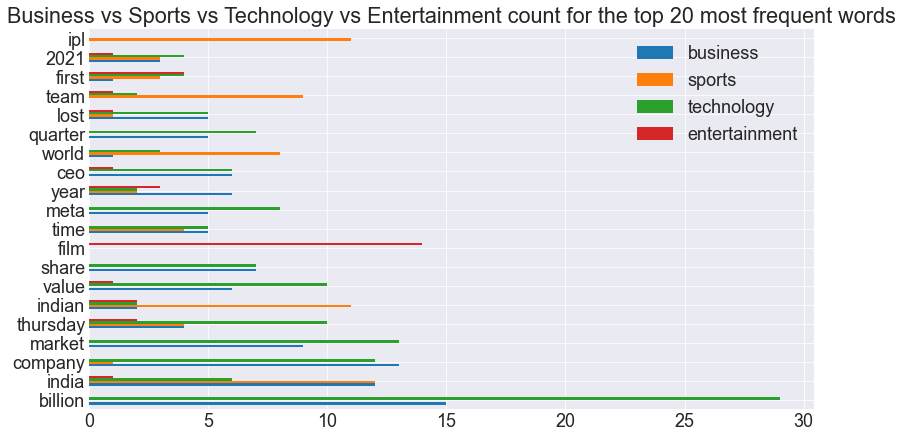

In [34]:
plt.rc('font', size=18)
word_counts.sort_values('all', ascending=False).head(20)[['business','sports','technology','entertainment']].plot.barh()
plt.title('Business vs Sports vs Technology vs Entertainment count for the top 20 most frequent words')

In [43]:
word_counts.sort_values('all', ascending=False).head(20).apply(lambda row: row/row['all'], axis = 1)

,business,sports,technology,entertainment,all
billion,0.340909,0.000000,0.659091,0.000000,1.0
india,0.387097,0.387097,0.193548,0.032258,1.0
company,0.500000,0.038462,0.461538,0.000000,1.0
market,0.409091,0.000000,0.590909,0.000000,1.0
thursday,0.200000,0.200000,0.500000,0.100000,1.0
indian,0.117647,0.647059,0.117647,0.117647,1.0
value,0.352941,0.000000,0.588235,0.058824,1.0
share,0.500000,0.000000,0.500000,0.000000,1.0
film,0.000000,0.000000,0.000000,1.000000,1.0
time,0.357143,0.285714,0.357143,0.000000,1.0


Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

<Figure size 1152x648 with 0 Axes>

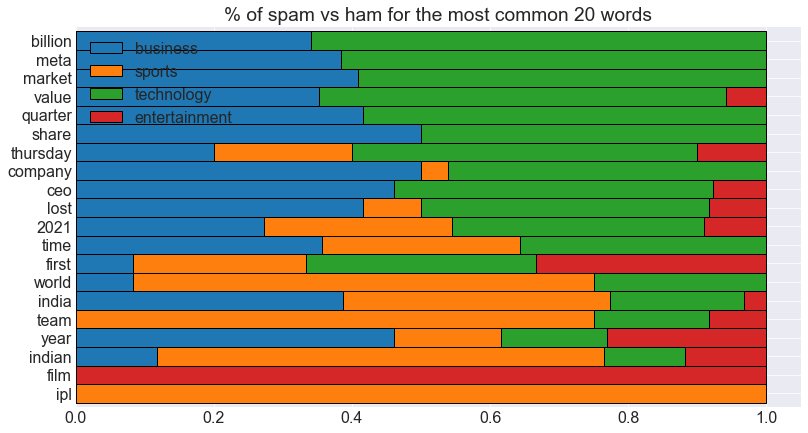

In [44]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = ['all'])
 .sort_values(by = 'technology')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of spam vs ham for the most common 20 words')

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

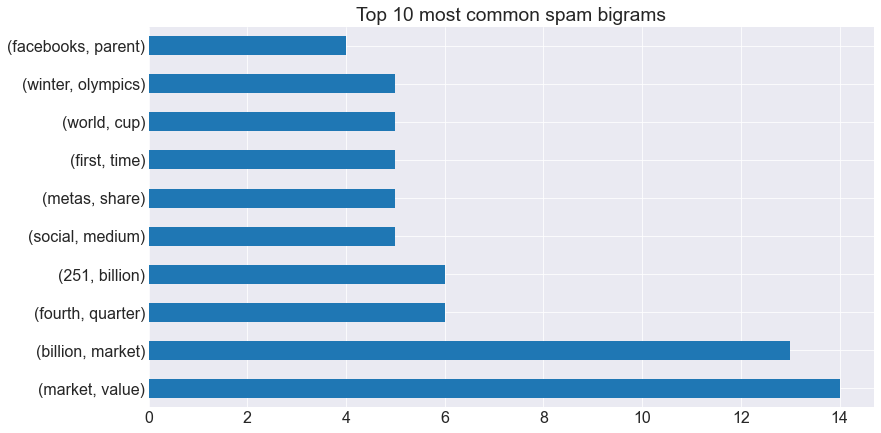

In [45]:
pd.Series(nltk.bigrams(all_lemmatized.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common bigrams')

(-0.5, 799.5, 599.5, -0.5)

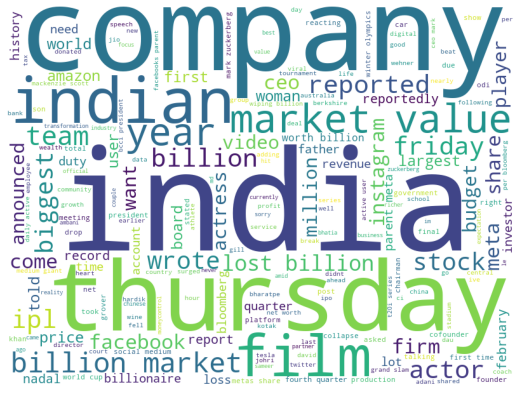

In [46]:
from wordcloud import WordCloud
img = WordCloud(background_color='white', width=800, height=600).generate(all_lemmatized)
plt.imshow(img)
plt.axis('off')

In [47]:
df.head()

,title,author,content,date,category,clean,stemmed,lemmatized
0,Drop in Meta's market value more than the tota...,Arshiya Chopra,After Facebook parent Meta lost $251 billion i...,"04 Feb 2022,Friday",business,facebook parent meta lost 251 billion market v...,facebook parent meta lost 251 billion market v...,facebook parent meta lost 251 billion market v...
1,Meta drops below Berkshire Hathaway in market ...,Hiral Goyal,Meta Platforms is now worth about $50 billion ...,"04 Feb 2022,Friday",business,meta platforms worth 50 billion less berkshire...,meta platform worth 50 billion less berkshir h...,meta platform worth 50 billion le berkshire ha...
2,Facebook's user growth in India slowed due to ...,Sakshita Khosla,Facebook's user growth in India was hit due to...,"04 Feb 2022,Friday",business,facebooks user growth india hit due hike prepa...,facebook user growth india hit due hike prepai...,facebooks user growth india hit due hike prepa...
3,Amazon adds $135 bn in one of the biggest 1-da...,Hiral Goyal,Amazon added more than $135 billion in market ...,"04 Feb 2022,Friday",business,amazon 135 billion market value biggest single...,amazon ad 135 billion market valu biggest sing...,amazon 135 billion market value biggest single...
4,I am sorry for nothing: BharatPe Co-founder As...,Kiran Khatri,When asked if he'd want to say something to hi...,"04 Feb 2022,Friday",business,asked hed want say something employees feel mi...,ask hed want say someth hi employe feel mistre...,asked hed want say something employee feel mis...


In [53]:
df['message_length'] = df.lemmatized.apply(len)
df.head()

,title,author,content,date,category,clean,stemmed,lemmatized,message,word_count,message_length
0,Drop in Meta's market value more than the tota...,Arshiya Chopra,After Facebook parent Meta lost $251 billion i...,"04 Feb 2022,Friday",business,facebook parent meta lost 251 billion market v...,facebook parent meta lost 251 billion market v...,facebook parent meta lost 251 billion market v...,223,32,223
1,Meta drops below Berkshire Hathaway in market ...,Hiral Goyal,Meta Platforms is now worth about $50 billion ...,"04 Feb 2022,Friday",business,meta platforms worth 50 billion less berkshire...,meta platform worth 50 billion less berkshir h...,meta platform worth 50 billion le berkshire ha...,296,42,296
2,Facebook's user growth in India slowed due to ...,Sakshita Khosla,Facebook's user growth in India was hit due to...,"04 Feb 2022,Friday",business,facebooks user growth india hit due hike prepa...,facebook user growth india hit due hike prepai...,facebooks user growth india hit due hike prepa...,232,37,232
3,Amazon adds $135 bn in one of the biggest 1-da...,Hiral Goyal,Amazon added more than $135 billion in market ...,"04 Feb 2022,Friday",business,amazon 135 billion market value biggest single...,amazon ad 135 billion market valu biggest sing...,amazon 135 billion market value biggest single...,229,34,229
4,I am sorry for nothing: BharatPe Co-founder As...,Kiran Khatri,When asked if he'd want to say something to hi...,"04 Feb 2022,Friday",business,asked hed want say something employees feel mi...,ask hed want say someth hi employe feel mistre...,asked hed want say something employee feel mis...,280,39,280


In [49]:
df['word_count'] = df.lemmatized.apply(str.split).apply(len)
df.head()

,title,author,content,date,category,clean,stemmed,lemmatized,message,word_count
0,Drop in Meta's market value more than the tota...,Arshiya Chopra,After Facebook parent Meta lost $251 billion i...,"04 Feb 2022,Friday",business,facebook parent meta lost 251 billion market v...,facebook parent meta lost 251 billion market v...,facebook parent meta lost 251 billion market v...,223,32
1,Meta drops below Berkshire Hathaway in market ...,Hiral Goyal,Meta Platforms is now worth about $50 billion ...,"04 Feb 2022,Friday",business,meta platforms worth 50 billion less berkshire...,meta platform worth 50 billion less berkshir h...,meta platform worth 50 billion le berkshire ha...,296,42
2,Facebook's user growth in India slowed due to ...,Sakshita Khosla,Facebook's user growth in India was hit due to...,"04 Feb 2022,Friday",business,facebooks user growth india hit due hike prepa...,facebook user growth india hit due hike prepai...,facebooks user growth india hit due hike prepa...,232,37
3,Amazon adds $135 bn in one of the biggest 1-da...,Hiral Goyal,Amazon added more than $135 billion in market ...,"04 Feb 2022,Friday",business,amazon 135 billion market value biggest single...,amazon ad 135 billion market valu biggest sing...,amazon 135 billion market value biggest single...,229,34
4,I am sorry for nothing: BharatPe Co-founder As...,Kiran Khatri,When asked if he'd want to say something to hi...,"04 Feb 2022,Friday",business,asked hed want say something employees feel mi...,ask hed want say someth hi employe feel mistre...,asked hed want say something employee feel mis...,280,39


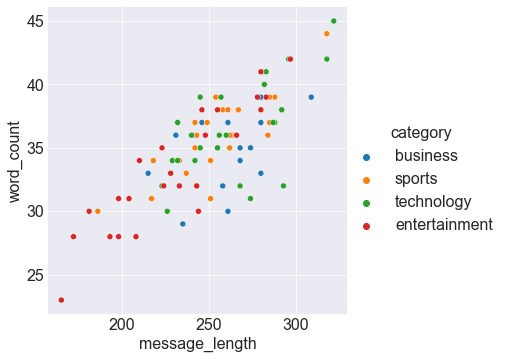

In [55]:
sns.relplot(data = df, x = 'message_length', y = 'word_count', hue = 'category')

In [56]:
df.groupby('category').message_length.agg(['mean', 'median'])

,mean,median
category,,
business,260.24,261
entertainment,232.00,233
sports,255.68,255
technology,264.00,257
